In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in product information
products = pd.read_csv('C:/DS/Springboard/1st_capstone_project/products/products.csv')


In [3]:
#check order information
df_pr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__prior/order_products__prior.csv')
df_tr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__train/order_products__train.csv')

# Part 1: Data Wrangling 

In [4]:
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')

In [5]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [6]:
len(ord_df[ord_df['eval_set']=='test'])

75000

In [7]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
#check for missing value
print(df_pr.isna().sum())
print(df_tr.isna().sum())
print(ord_df.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [10]:
# check relationship between prior and train dataset
ord_df[ord_df['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [11]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [12]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [13]:
#check difference between prior, test and train
#user id count
ord_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


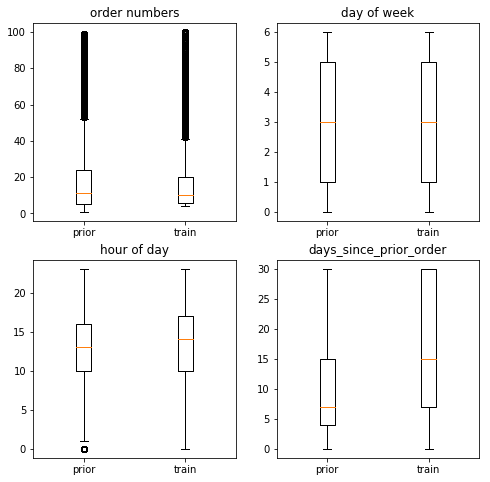

In [14]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number']])
a.set_xticks([1,2])
a.set_xticklabels(['prior','train'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow']])
b.set_xticks([1,2])
b.set_xticklabels(['prior','train'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day']])
c.set_xticks([1,2])
c.set_xticklabels(['prior','train'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),ord_df[ord_df['eval_set']=='train']['days_since_prior_order']])
d.set_xticks([1,2])
d.set_xticklabels(['prior','train'])
d.set_title('days_since_prior_order')
plt.show()

# Findings: 
1. order.csv includes information on orders such as order id in database, order number for this user, user id, which set it belongs to (prior, test or training) and when it happens(day of week, order time of day, days since prior order)
2. orders_products datasets store information on each order, including order id, product id, add to cart order and whether it is a reorder
3. The only missing value in the datset is "days since prior order" for some orders in prior set since they are first time orders.
4. There are no outliers found.
5. Users in prior set are divided to training and test sets.
6. For users in the training set, one order is hold out in the training set and the rest orders are in prior.

# Part 2: Exploratory Data Analysis

In [15]:
import seaborn as sns
color = sns.color_palette()


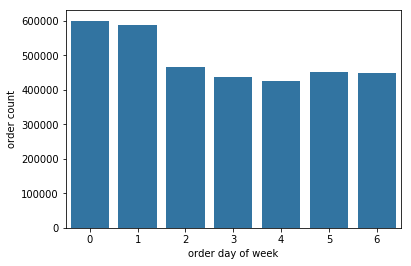

In [16]:
#when users usually order
sns.countplot(x='order_dow',data=ord_df,color=color[0])
plt.xlabel('order day of week')
plt.ylabel('order count')
plt.show()

<div class="alert alert-success">
- Day 0 and 1 have higher orders, they should be Saturday and Sunday. Wednesday has the lowest order counts.
</div>

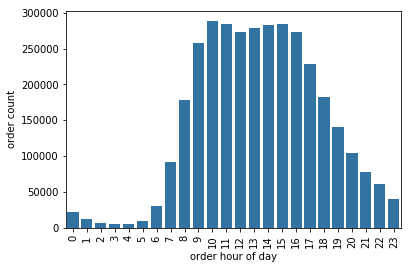

In [17]:
# what time customers order
sns.countplot(x="order_hour_of_day", data=ord_df,color=color[0])
plt.xlabel('order hour of day')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Most orders happen during daytime about 9 am - 4 pm
</div>

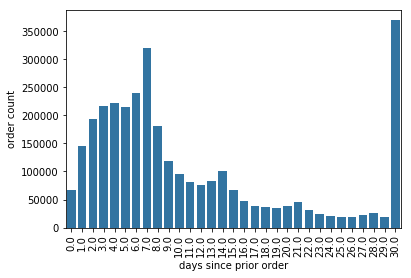

In [18]:
# frequency of customers ordering
sns.countplot(x="days_since_prior_order", data=ord_df,color=color[0])

plt.xlabel('days since prior order')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Customers most likely order again after 30 days since prior order, followed by 7 days. 
</div>

In [19]:
# proportion of orders that are reorders
pr_reord = df_pr['reordered'].sum()/len(df_pr)
tr_reord = df_tr['reordered'].sum()/len(df_tr)
print("percentage of reorder in prior set is:",pr_reord)
print("percentage of reorder in test set is:",tr_reord)

percentage of reorder in prior set is: 0.5896974667922161
percentage of reorder in test set is: 0.5985944127509629


<div class="alert alert-success">
About 59% of the orders are reorder
</div>

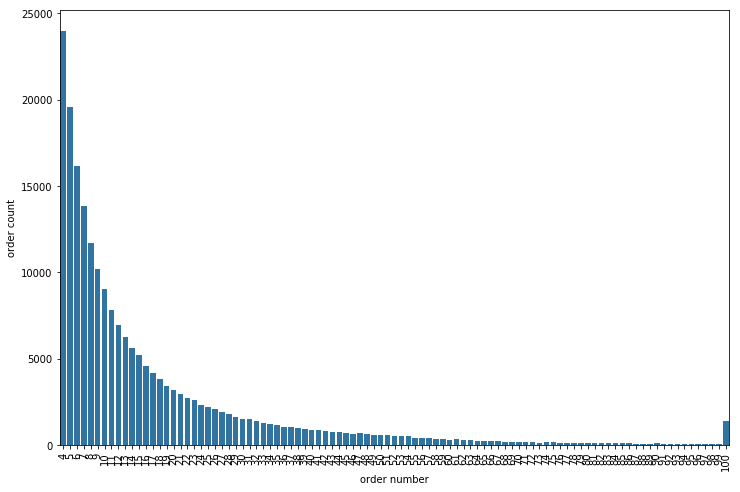

In [20]:
# how many orders customer make
pr_no = ord_df.groupby('user_id')['order_number'].max().reset_index(name='orders_total')
plt.figure(figsize=(12,8))
sns.countplot(x="orders_total", data=pr_no,color=color[0])
plt.xlabel('order number')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Customers make at least 4 orders and at most 100 orders. 
</div>

In [21]:
department = pd.read_csv('C:/DS/Springboard/1st_capstone_project/departments/departments.csv')
aisle = pd.read_csv('C:/DS/Springboard/1st_capstone_project/aisles/aisles.csv')

In [22]:
#dataframe for prior set with all order related info
pr_ord = pd.merge(df_pr,ord_df,on='order_id',how='left')
pr_ord = pd.merge(pr_ord,products,on='product_id',how='left')

pr_ord.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


                    index   count
0                  Banana  472565
1  Bag of Organic Bananas  379450
2    Organic Strawberries  264683
3    Organic Baby Spinach  241921
4    Organic Hass Avocado  213584


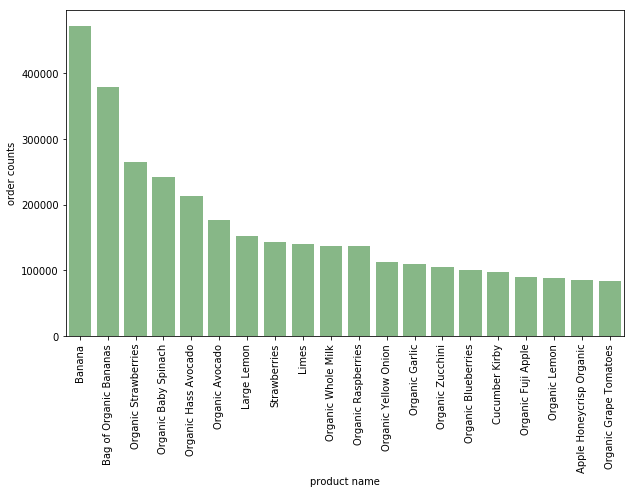

In [23]:
#check what products are ordered the most 
product_count_pr = pr_ord['product_name'].value_counts().reset_index(name="count")
print(product_count_pr.head())

fig = plt.figure(figsize=(10,6))

sns.barplot(x='index',y='count',data=product_count_pr.iloc[0:20,:],color='g',alpha=0.5)
plt.xlabel('product name')
plt.xticks(rotation='vertical')
plt.ylabel('order counts')

plt.show()

<div class="alert alert-success">
Most ordered products are fresh fruits and vegetables. 
</div>

                                   product_name  reorder_ratio
37375                       Raw Veggie Wrappers       0.941176
39866  Serenity Ultimate Extrema Overnight Pads       0.931034
28412                       Orange Energy Shots       0.923077
8535                         Chocolate Love Bar       0.920792
41719                 Soy Powder Infant Formula       0.914286


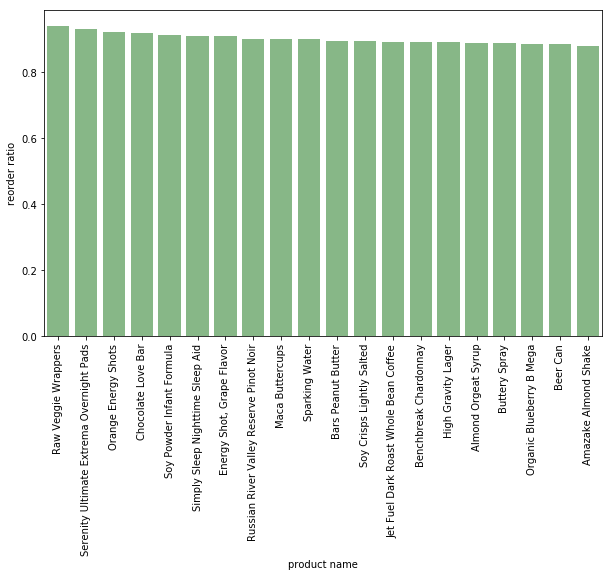

In [24]:
#products having highest reorder ratio
product_pr_reo = pr_ord.groupby('product_name')['reordered'].mean().reset_index(name='reorder_ratio').sort_values('reorder_ratio',ascending=False)
print(product_pr_reo.head())

fig = plt.figure(figsize=(10,6))

sns.barplot(x='product_name',y='reorder_ratio',data=product_pr_reo.iloc[0:20,:],color='g',alpha=0.5)
plt.xlabel('product name')
plt.xticks(rotation='vertical')
plt.ylabel('reorder ratio')
plt.show()


<div class="alert alert-success">
Products with high reorder ratio are those items whose buyers are "loyal" or have high preference to them. As seen from the plot above, most of the products with highest reorder ratio are kind of snacks, not daily necessaries. 
</div>

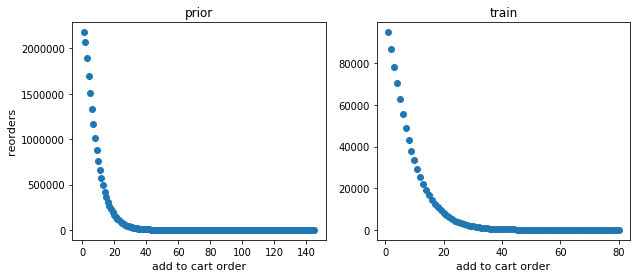

In [25]:
#check relationship between reorder times and add to cart order
df_pr_gp = df_pr.groupby('add_to_cart_order')['reordered'].sum()
df_pr_gp = df_pr_gp.reset_index()
df_pr_gp.columns = ['add_to_cart_order','reorder_sum']

df_tr_gp = df_tr.groupby('add_to_cart_order')['reordered'].sum()
df_tr_gp = df_tr_gp.reset_index()
df_tr_gp.columns = ['add_to_cart_order','reorder_sum']
#df_pr_gp.head()
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.scatter(df_pr_gp['add_to_cart_order'],df_pr_gp['reorder_sum'])
a.set_xlabel('add to cart order',fontsize=11)
a.set_ylabel('reorders',fontsize=11)
a.set_title('prior')

b = fig.add_subplot(122)
plt.scatter(df_tr_gp['add_to_cart_order'],df_tr_gp['reorder_sum'])
b.set_xlabel('add to cart order',fontsize=11)
b.set_title('train')

plt.show()

<div class="alert alert-success">
There is a clear nonlinear pattern between reorder counts and add to cart orders. The products adding to cart first are reordered the most.
</div>

# What aisles and deparments have most reorders

    department_id  reorder_sum
3               4      6160710
15             16      3627221
6               7      1757892
     aisle_id  reorder_sum
23         24      2615469
82         83      2032172
122       123      1127177


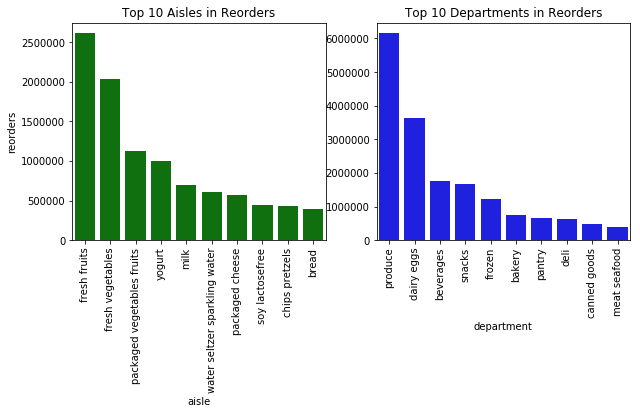

In [26]:
pr_dep = pr_ord.groupby('department_id')['reordered'].sum().reset_index(name='reorder_sum').sort_values('reorder_sum',ascending=False)
pr_ais = pr_ord.groupby('aisle_id')['reordered'].sum().reset_index(name='reorder_sum').sort_values('reorder_sum',ascending=False)
print(pr_dep.head(3))
print(pr_ais.head(3))
pr_dep = pr_dep.merge(department,on='department_id')
pr_ais = pr_ais.merge(aisle,on='aisle_id')

x = np.arange(0,10,1)
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
sns.barplot(x='aisle',y='reorder_sum',data=pr_ais.iloc[0:10,:],color='g')
a.set_title('Top 10 Aisles in Reorders',fontsize=12)
a.set_ylabel('reorders')
plt.xticks(rotation=90)


b = fig.add_subplot(122)
sns.barplot(x='department',y='reorder_sum',data=pr_dep.iloc[0:10,:],color='b')
b.set_title('Top 10 Departments in Reorders',fontsize=12)
b.set_ylabel('')
plt.xticks(rotation=90)


plt.show()

<div class="alert alert-success">
The most reordered aisles are fresh fruits and vegetables. The most reordered departments are produce and dairy eggs.
</div>

# department reorder ratio

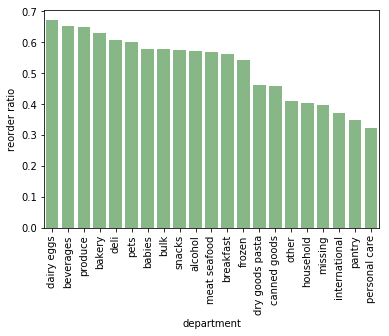

In [27]:
dep_reo = pr_ord.groupby('department_id')['reordered'].mean().reset_index(name='reorder_ratio').sort_values('reorder_ratio',ascending=False)
dep_reo = dep_reo.merge(department,on='department_id')
sns.barplot(x='department',y='reorder_ratio',data=dep_reo,color='g',alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('reorder ratio')
plt.show()

<div class="alert alert-success">
Reorder ratio is high in dairy eggs, beverages, and produce and lowest in personal care.
</div>

# customer reorder habits

In [28]:
pr_ord = pr_ord.dropna()  #remove rows of first time orders
pr_reorder = pr_ord.groupby('user_id')['reordered'].mean()
pr_reorder = pr_reorder.reset_index()
pr_reorder.columns = ['user_id','reorder_ratio']
print(pr_reorder.head())
user_1 = len(pr_reorder[pr_reorder['reorder_ratio'] == 1])
user_0 = len(pr_reorder[pr_reorder['reorder_ratio'] == 0])
print("There are",user_1,"customers always reorder what they buy before")
print("There are",user_0,"customers never reorder what they buy before")

   user_id  reorder_ratio
0        1       0.759259
1        2       0.510989
2        3       0.705128
3        4       0.071429
4        5       0.538462
There are 971 customers always reorder what they buy before
There are 3045 customers never reorder what they buy before


<div class="alert alert-success">
There are 971 customers always reorder what they buy before.  
There are 3045 customers never reorder what they buy before
</div>

# Part 3: Feature selection


In [29]:
ord_test = ord_df[ord_df['eval_set']=='test']
print(ord_test.head())

     order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
38    2774568        3     test            13          5                 15   
44     329954        4     test             6          3                 12   
53    1528013        6     test             4          3                 16   
96    1376945       11     test             8          6                 11   
102   1356845       12     test             6          1                 20   

     days_since_prior_order  
38                     11.0  
44                     30.0  
53                     22.0  
96                      8.0  
102                    30.0  


<div class="alert alert-success">
Based on the data availability in test dataset, choose 6 features as independent variables in the first round:  
product_id  
user_id  
order_number  
order_dow  
order_hour_of_day  
days_since_prior_order
</div>

In [30]:
# check for correlation 
column_list = ['product_id','user_id','order_number', 'order_dow', 'order_hour_of_day','days_since_prior_order','reordered']
pr_cor = pr_ord[column_list].corr()


                        product_id   user_id  order_number  order_dow  \
product_id                1.000000  0.000124     -0.001904  -0.002254   
user_id                   0.000124  1.000000     -0.000763  -0.001936   
order_number             -0.001904 -0.000763      1.000000   0.015291   
order_dow                -0.002254 -0.001936      0.015291   1.000000   
order_hour_of_day         0.000976 -0.000865     -0.039478   0.012708   
days_since_prior_order    0.000800  0.000556     -0.358422  -0.030002   
reordered                 0.004243 -0.000866      0.250973  -0.008801   

                        order_hour_of_day  days_since_prior_order  reordered  
product_id                       0.000976                0.000800   0.004243  
user_id                         -0.000865                0.000556  -0.000866  
order_number                    -0.039478               -0.358422   0.250973  
order_dow                        0.012708               -0.030002  -0.008801  
order_hour_of_day   

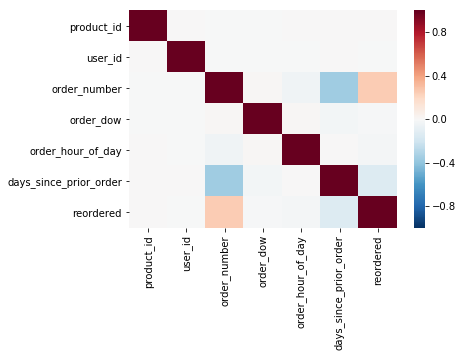

In [31]:
print(pr_cor)
sns.heatmap(pr_cor,vmin=-1,vmax=1,cmap='RdBu_r')
plt.show()

<div class="alert alert-success">
Among the 6 selected features, no significant correlation is found between these features except "days since prior order" negatively correlate with "order number" with a pearson correlation coefficient of -0.35. Order number positively correlates with reordering. 
</div>

# Part 4: Model

In [32]:
# use prior dataset to fit and get user level parameters
feature_list = ['product_id','user_id','order_number', 'order_dow', 'order_hour_of_day','days_since_prior_order']
X_prior = pr_ord[feature_list]
y_prior = pr_ord['reordered']

# use train dataset to evaluate model performance
tr_ord = pd.merge(df_tr,ord_df,on='order_id',how='left')
X_train = tr_ord[feature_list]
y_train = tr_ord['reordered']

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Pipeline includes two steps: scaling and modeling**

In [112]:
scaler = StandardScaler()
model = LogisticRegression(random_state=12)
pipeline = make_pipeline(scaler,model)

In [113]:
#model fit
pipeline.fit(X_prior,y_prior)
y_pr_pre = pipeline.predict(X_prior)
y_tr_pre = pipeline.predict(X_train)
print("accuracy score on prior set is:",accuracy_score(y_prior,y_pr_pre))
print("f1 score on prior set is:",f1_score(y_prior,y_pr_pre))
print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))

accuracy score on prior set is: 0.6586202635679614
f1 score on prior set is: 0.7751364735720666
accuracy score on train set is: 0.629228154789375
f1 score on train set is: 0.7432649025798183


<div class="alert alert-success">
Logistic Regression and 6 predicting variables     (product_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,order_number) yield reasonable resutls:     
accuracy score on prior set is: 0.6586202635679614  
f1 score on prior set is: 0.7751364735720666  
accuracy score on train set is: 0.629228154789375  
f1 score on train set is: 0.7432649025798183
</div>

In [114]:
# construct array for test

# products users in test set ordered before
pr_ord_sel = pd.merge(df_pr[['order_id','product_id']],ord_df[['order_id','user_id']],on='order_id',how='left')
pr_ord_uni = pr_ord_sel[['user_id','product_id']].drop_duplicates()
print(pr_ord_uni.head())
# combine product info with test order info
pro_test = pd.merge(pr_ord_uni,ord_test,on='user_id',how='inner')
print(pro_test.head())

   user_id  product_id
0   202279       33120
1   202279       28985
2   202279        9327
3   202279       45918
4   202279       30035
   user_id  product_id  order_id eval_set  order_number  order_dow  \
0    45082       17330     65432     test            11          4   
1    45082       27407     65432     test            11          4   
2    45082       35419     65432     test            11          4   
3    45082         196     65432     test            11          4   
4    45082       44635     65432     test            11          4   

   order_hour_of_day  days_since_prior_order  
0                 12                    15.0  
1                 12                    15.0  
2                 12                    15.0  
3                 12                    15.0  
4                 12                    15.0  


In [115]:
print(ord_test.info())
print(pro_test.info())
print(pro_test.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 38 to 3421068
Data columns (total 7 columns):
order_id                  75000 non-null int64
user_id                   75000 non-null int64
eval_set                  75000 non-null object
order_number              75000 non-null int64
order_dow                 75000 non-null int64
order_hour_of_day         75000 non-null int64
days_since_prior_order    75000 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833292 entries, 0 to 4833291
Data columns (total 8 columns):
user_id                   int64
product_id                int64
order_id                  int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(6), object(1)
memory usage: 331.9+ MB
None
user_id                   0
product_id            

# Predict on test set

In [116]:
X_test = pro_test[feature_list]
y_test_pre = pipeline.predict(X_test)

In [124]:
# convert predicted results to required format
df_test = pd.DataFrame(y_test_pre)
df_test.columns = ['reorder']
print(df_test.head())
print(len(df_test))
result = pd.concat([pro_test[['user_id','order_id','product_id']],df_test],axis=1)
print(result.head())
print(result.info())

   reorder
0        1
1        1
2        1
3        1
4        1
4833292
   user_id  order_id  product_id  reorder
0    45082     65432       17330        1
1    45082     65432       27407        1
2    45082     65432       35419        1
3    45082     65432         196        1
4    45082     65432       44635        1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833292 entries, 0 to 4833291
Data columns (total 4 columns):
user_id       int64
order_id      int64
product_id    int64
reorder       int64
dtypes: int64(4)
memory usage: 184.4 MB
None


In [125]:
result_reorder = result[result['reorder']==1][['order_id','product_id']]
result_reorder = result_reorder.groupby('order_id')['product_id'].unique()
print(result_reorder.head())
result_reorder.to_csv('C:/DS/Springboard/1st_capstone_project/submission.csv')

order_id
17     [21709, 13107, 38777, 48896, 1283, 13535, 4776...
34     [46979, 9337, 9839, 44910, 44663, 48523, 2596,...
137    [38689, 24852, 41787, 43352, 23794, 48845, 311...
182    [33198, 27344, 18011, 49235, 23645, 47209, 136...
257    [38558, 24852, 15438, 49235, 4605, 30233, 1245...
Name: product_id, dtype: object


# Part 5: Result Analysis

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
scaler = StandardScaler()
model = RandomForestClassifier(n_estimators=10,random_state=12)
pipeline = make_pipeline(scaler,model)

In [36]:
#model fit
pipeline.fit(X_prior,y_prior)
y_pr_pre = pipeline.predict(X_prior)
y_tr_pre = pipeline.predict(X_train)
print("accuracy score on prior set is:",accuracy_score(y_prior,y_pr_pre))
print("f1 score on prior set is:",f1_score(y_prior,y_pr_pre))
print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))

accuracy score on prior set is: 0.9833177633160378
f1 score on prior set is: 0.986714445861668
accuracy score on train set is: 0.5994126895740843
f1 score on train set is: 0.6796417180805533


<div class="alert alert-success">
Since the fitting result on prior set is much better than the result on train set, Random Forest overfits 
</div>

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
scaler = StandardScaler()
model = KNeighborsClassifier()
pipeline = make_pipeline(scaler,model)

In [ ]:
#model fit
pipeline.fit(X_prior,y_prior)
y_pr_pre = pipeline.predict(X_prior)
y_tr_pre = pipeline.predict(X_train)
print("accuracy score on prior set is:",accuracy_score(y_prior,y_pr_pre))
print("f1 score on prior set is:",f1_score(y_prior,y_pr_pre))
print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))